In [1]:
import numpy as np
import random
import time
import gym
from collections import defaultdict
import itertools
import matplotlib
import matplotlib.style
import pandas as pd
import sys
matplotlib.style.use('ggplot')
import plotting
import numpy as np

In [2]:
## First visit monte carlo

In [15]:
class environment:
    def __init__(self):
        self.env_rows = 7
        self.env_columns = 7
        self.actions = ['up', 'right', 'down', 'left']
        self.V = np.zeros((self.env_rows, self.env_columns, len(self.actions)))
        self.rewards = np.full((self.env_rows, self.env_columns), -1)
        self.rewards[2,3] = 100
        self.fire = {}
        self.fire[0] = [3,6]
        self.fire[1] = [2,6]
        self.fire[2] = [1,5]
        self.fire[3] = []
        self.fire[4] = [2,4]
        self.fire[5] = [0,3]
        self.fire[6] = [4,6]
        for row_index in range(self.env_rows):
            for column_index in self.fire[row_index]:
                self.rewards[row_index, column_index] = -100

In [16]:
env = environment()

In [17]:
print(env.rewards)

[[  -1   -1   -1 -100   -1   -1 -100]
 [  -1   -1 -100   -1   -1   -1 -100]
 [  -1 -100   -1  100   -1 -100   -1]
 [  -1   -1   -1   -1   -1   -1   -1]
 [  -1   -1 -100   -1 -100   -1   -1]
 [-100   -1   -1 -100   -1   -1   -1]
 [  -1   -1   -1   -1 -100   -1 -100]]


In [13]:
def is_terminal_state(current_row_index, current_column_index):
    if env.rewards[current_row_index, current_column_index] == -1:
        return False
    else:
        return True

In [7]:
def get_initial_state():
    current_row_index = np.random.randint(0, env.env_rows - 1)
    current_column_index = np.random.randint(0, env.env_columns - 1)
    while is_terminal_state(current_row_index, current_column_index):
        current_row_index = np.random.randint(0, env.env_rows-1)
        current_column_index = np.random.randint(0, env.env_columns-1)
    return current_row_index, current_column_index

In [20]:
def get_action(current_row_index, current_column_index, epsilon):
        return np.random.choice(4, p =[0.25,0.25,0.25,0.25])

In [9]:
def get_next_location(current_row_index, current_column_index, action_index):
    new_row_index = current_row_index
    new_column_index = current_column_index
    if env.actions[action_index] == 'up' and current_row_index  > 0:
        new_row_index -= 1
    elif env.actions[action_index] == 'right' and current_column_index < env.env_columns - 1:
        new_column_index += 1
    elif env.actions[action_index] == 'down' and current_row_index < env.env_rows - 1:
        new_row_index += 1
    elif env.actions[action_index] == 'left' and current_column_index > 0:
        new_column_index -= 1
    return new_row_index, new_column_index

In [48]:
epsilon = 0.9 #the percentage of time when we should take the best action (instead of a random action)
discount_factor = 0.2 #discount factor for future rewards (gamma)
learning_rate = 0.8 #the rate at which the agent should learn
num_episodes = 1000
episode_lengths = np.zeros(num_episodes)
episode_rewards = np.zeros(num_episodes)
optimal_action = np.zeros((env.env_rows, env.env_columns))
number_of_visit_matrix = np.zeros((env.env_rows, env.env_columns))

for episode in range(num_episodes):
    G = 0    
    row_index, column_index = get_initial_state()
    number_of_visit_matrix[row_index, column_index] += 1 
    initial_row_index, initial_column_index = row_index, column_index
    action_index = get_action(row_index, column_index, epsilon)
    while not is_terminal_state(row_index, column_index):
        action_index = get_action(row_index, column_index, epsilon)
        row_index, column_index = get_next_location(row_index, column_index, action_index)
        reward = env.rewards[row_index, column_index]
        
        G = discount_factor * G + reward
    
    #if env.V[row_index, column_index, action_index] < G / number_of_visit_matrix[initial_row_index, initial_column_index]:
        
    env.V[row_index, column_index, action_index] = G / number_of_visit_matrix[initial_row_index, initial_column_index]
    optimal_action[initial_row_index, initial_column_index] = np.argmax(env.V[row_index, column_index])
    
    episode_rewards[episode] = G / number_of_visit_matrix[initial_row_index, initial_column_index]
    
print('Training complete!')

Training complete!


In [49]:
def get_shortest_path(start_row_index, start_column_index):
  #return immediately if this is an invalid starting location
    if is_terminal_state(start_row_index, start_column_index):
        return []
    else: #if this is a 'legal' starting location
        current_row_index, current_column_index = start_row_index, start_column_index
        shortest_path = []
        shortest_path.append([current_row_index, current_column_index])
    #continue moving along the path until we reach the goal (i.e., the item packaging location)
        while not is_terminal_state(current_row_index, current_column_index):
      #get the best action to take
            action_index = int(optimal_action[current_row_index, current_column_index])
      #move to the next location on the path, and add the new location to the list
            current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
            shortest_path.append([current_row_index, current_column_index])
        return shortest_path

In [50]:
get_shortest_path(3,6)

[[3, 6], [2, 6], [1, 6]]

In [51]:
import matplotlib.pyplot as plt

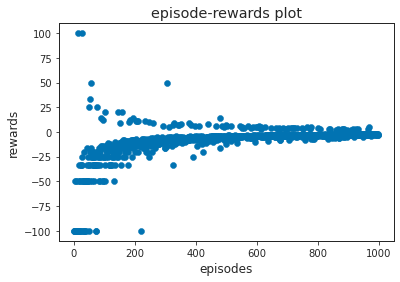

In [52]:
#plt.scatter([i for i in range(num_episodes)], episode_rewards)
plt.scatter([i for i in range(1000)], episode_rewards[:1000])
plt.xlabel('episodes')
plt.ylabel('rewards')
plt.title('episode-rewards plot')
plt.show()